# Artificial Intelligence
# 464/664
# Assignment #5

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, 
02. Output format should be exactly as requested (it is your responsibility to make sure notebook looks as expected on Gradescope),
03. Each helper function should be preceeded by documentation (Markdown cell), 
04. Each helper function should be followed by three assert-style unit tests,
05. Functions should do only one thing,
06. Check submission deadline on Gradescope, 
07. Rename the file to Last_First_assignment_5, 
08. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
09. Do not submit any other files.

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

You might need to do a install to work with networkx

```
pip install networkx
```

## Map Coloring

It turns out that any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors (see [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem), for more details) This **Constraint Satisfaction Problem** can be viewed as a constraint graph, where variables are nodes and no adjacent nodes can be of the same color.


Our first constraint graph is the dictionary `connecticut_graph` with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.

In [2]:
connecticut_graph = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print(connecticut_graph)

{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


<a id="color_map"></a>
## color_map

This function colors a map provided as a constraint graph. The inputs are the constraint graph and a list of colors. Implementation should feature: 1) Backtracking, 2) Forward Checking, 3) variables picked using the Degreee Heuristic, and 4) Values picked using the Least Constrained Values heuristic. Each feature should be its own helper function, documented and tested.  

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **color_list** List: the domain available to variables at the start of the CSP.
* **trace** Bool: a flag that when set to True, prints out statements that show what it is currently doing (in terms of the four features)


**returns** 


* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples, where the ordering matches the original ordering of nodes in the constraint_graph. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`If the CSP cannot find a solution, `None` is returned.

In [3]:
def color_map(constraint_graph, color_list, trace=False):
    # Fix. Everything is colored red right now. 
    # With your implementation, if a solution can't be found, it should return `None`.
    # Add features: 
    # 1) Backtracking, 
    # 2) Forward Checking, 
    # 3) Variables picked using the Degreee Heuristic, and 
    # 4) Values picked using the Least Constrained Values heuristic. 
    # Features should be helper functions, documented and tested.
    num_nodes = len(constraint_graph["nodes"])
    assignment = []
    for node in range(num_nodes):
        assignment.append((node, None))
    possible = [[1 for _ in color_list] for _ in range(num_nodes)]
    sol = backtrack(constraint_graph, color_list, assignment, trace, possible)
    
    if sol is None:
        if trace: print("None")
        return None
    else:
        if trace: print("solution:", sol)
        return sol

<a id="color_map"></a>
## backtrack

this function recursively uses backtracking (if the assignment isn't valid) and forward checking (to attempt different assignments) to come up with a solution assignment

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **color_list** List: the domain available to variables at the start of the CSP.
* **assignment** List: the proposed assignment representing the current color assignments to nodes
* **trace** Bool: a flag that when set to True, prints out statements that show what it is currently doing (in terms of the four features)
* **possible** List: the possibile colors for nodes. has 0 when a color can't be assigned to a node and 1 when it can (list of lists)

**returns** 


* **sol** List: a solution assignment (if it's valid)

In [4]:
def backtrack(constraint_graph, color_list, assignment, trace, possible):
    if all(color is not None for _, color in assignment):
        return assignment  
    node = degreeh(constraint_graph, assignment)
    candidates = lcvh(constraint_graph, node, assignment, color_list, possible)
    for candidate in candidates:
        if isvalid(constraint_graph, node, candidate, assignment):
            assignment[node] = (node, candidate)
            new_possible = deepcopy(possible)
            removed = forwardcheck(constraint_graph, node, candidate, new_possible, trace)
            if trace:                print(f"assigned {candidate} to {constraint_graph['nodes'][node]}")
            sol = backtrack(constraint_graph, color_list, assignment, trace, new_possible)
            if sol is not None:
                return sol 
            for neighbor, color in removed.items():
                new_possible[neighbor].append(color)
            assignment[node] = (node, None) 
            if trace:                print(f"backtracked from {candidate} because {constraint_graph['nodes'][node]}")
    return None

In [5]:
cg = {1:[],2:[],3:[]}
color_list = ['red','blue','green']
p={1:['red','blue','green'], 2:['red','blue','green'], 3:['red','blue','green']}
assert backtrack(cg, color_list,{1: None, 2: None, 3: None}, trace=False, possible=p) == {1:"red", 2:"red", 3:"red"}
cg= {1:[2], 2:[1], 3:[]}
assert backtrack(1,edge_list,potential_colors,current_decisions = {n:None for n in range(1,4)},trace=False) == {1:"red", 2:"green", 3:"red"}
cg = {1:[2,3], 2:[1,3], 3:[1,2]}
assert backtrack(1,edge_list,potential_colors,current_decisions = {n:None for n in range(1,4)},trace=False) == {1:"red", 2:"green", 3:"blue"}



TypeError: cannot unpack non-iterable int object

<a id="color_map"></a>
## forwardcheck

this function uses forward checking to get rid of a node's color from its neighbors (since neighbors can't be the same color)

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **node** int: idx of the node to be assigned a color
* **color** List: the color to assign to the node
* **possible** List: the possibile colors for nodes. has 0 when a color can't be assigned to a node and 1 when it can (list of lists)
* **trace** Bool: a flag that when set to True, prints out statements that show what it is currently doing (in terms of the four features)


**returns** 


* **removed** dict: neighbors/colors that are to be removed according to forward check heuristic

In [ ]:
def forwardcheck(constraint_graph, node, color, possible, trace=False):
    removed = {}
    for edge in constraint_graph['edges']:
        if node in edge:
            neighbor = edge[1] if edge[0] == node else edge[0]
            if color in possible[neighbor]:
                possible[neighbor].remove(color)
                removed[neighbor] = color
                if trace:
                    print(f'forward check eliminated{color} from {constraint_graph["nodes"][neighbor]}')
    return removed

In [ ]:
cg = {'nodes': {'A': 0, 'B': 1, 'C': 2}, 'edges': [('A', 'B'), ('B', 'C'), ('C', 'A')]}
p={'A': ['red', 'green', 'blue'],'B': ['red', 'green', 'blue'],'C': ['red', 'green', 'blue']}
assert forwardcheck(cg, 'A', 'red', p) == {'B': 'red', 'C': 'red'}
assert forwardcheck(cg, 'A', 'green', p) == {'B': 'green', 'C': 'green'}
p2={'A': ['red', 'green', 'blue'],'B': ['green','blue'],'C': ['blue']}
assert forwardcheck(cg, 'C', 'blue', p2) == {'A': 'blue', 'B': 'blue'}

<a id="degreeh"></a>
## degreeh

this function evaluates the highest degree node that doesn't have a color assigned yet following the degree heuristic.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **assignment** List: the proposed assignment representing the current color assignments to nodes
* **trace** Bool: a flag that when set to True, prints out statements that show what it is currently doing (in terms of the four features)

**returns** 


* **sol** int: idx of the node that the degree heuristic identifies

In [ ]:
def degreeh(constraint_graph, assignment, trace=False):
    candidates = [node for node, color in assignment if color is None]
    if not candidates:
        return None
    
    degrees = []
    for node in candidates:
        degree = sum(1 for edge in constraint_graph["edges"] if node in edge)
        degrees.append(degree)
    
    max_degree_index = max(range(len(degrees)), key=lambda x: degrees[x])
    sol = candidates[max_degree_index]
    if trace:
        print(f"degree heuristic yields {constraint_graph['nodes'][sol]}")
    return sol

In [ ]:
cg = { "nodes": ["meow", "woof"],"edges": [(0,1)],"coordinates": [(10, 20), (30, 100)]}
assignment = [(0, None), (1, "red")]
assert degreeh(cg, assignment) == 0

cg = { "nodes": ["meow", "woof"],"edges": [(0,1)], "coordinates": [(10, 20), (30, 100)]}
assignment = [(0, "black"), (1, "red")]
assert degreeh(cg, assignment) == None

cg= { "nodes": ["a", "b", "c", "d"],"edges": [(0,1), (0,2), (1,2), (1,3), (2,3)],"coordinates": [( 40, 50), ( 60,140), (100, 70), (120,139)]}
assignment = [(0, None), (1, None), (2, "red"), (3, "yellow")]
assert degreeh(cg, assignment) == 1

<a id="color_map"></a>
## lcvh

this function evaluates using the least constrained value heuristic and returns color_list sorted in order of how "constraining" each color would be to the neighbors of the node (least first).

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **assignment** List: the proposed assignment
* **node** int: idx of the node to be assigned a color
* **color_list** List: the colors to assign to the node
* **possible** List: the possibile colors for nodes. has 0 when a color can't be assigned to a node and 1 when it can (list of lists)

**returns** 


* **color_order** list of colors ordered by the lcv heuristic

In [ ]:
def lcvh(constraint_graph, assignment, node, color_list, possible):
    color_order = deepcopy(color_list)
    neighbors = {e[1] for e in constraint_graph["edges"] if e[0] == node} | \
                {e[0] for e in constraint_graph["edges"] if e[1] == node}
        
    constraints = [0] * len(color_list)
    for neighbor in neighbors:
        for i, color_available in enumerate(possible[neighbor]):
            if color_available:
                constraints[i] += 1

    color_order.sort(key=lambda color: -constraints[color_list.index(color)])
    return color_order

In [ ]:
possible = {
            'A': ['red', 'blue', 'green'],
            'B': ['red', 'blue', 'green'],
            'C': ['red', 'blue', 'green']
        }

assignment = {'A': None, 'B': None, 'C': None}
cg = {
            'nodes': ['A', 'B', 'C'],
            'edges': [('A', 'B'), ('B', 'C'), ('A', 'C')]
        }
color_list = ['red', 'blue', 'green']
node = 'A'
expected_order = ['red', 'blue', 'green']
color_order = lcvh(cg, assignment, node, color_list, possible)
assert color_order== expected_order

possible['B'].remove('red')
possible['C'].remove('blue')
node = 'A'
expected_order = ['green', 'blue', 'red']
color_order = lcvh(cg, assignment, node, color_list, possible)
assert color_order!= expected_order

assignment['B'] = 'red'
node = 'A'
expected_order = ['red', 'blue', 'green']
color_order = lcvh(cg, assignment, node, color_list, possible)
assert (color_order== expected_order)

<a id="color_map"></a>
## isvalid

this function makes sure that a given assignment is valid ie doesn't violate color constraints.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **node** int: idx of the node to be assigned a color
* **color** List: the color to assign to the node
* **assignment** List: the proposed assignment

**returns** 


* **t/f** bool: if it's valid or not

In [ ]:
def isvalid(constraint_graph, node, color, assignment):
    for edge in constraint_graph["edges"]:
        node_1, node_2 = edge
        if node == node_1:
            adjacent = node_2
        elif node == node_2:
            adjacent = node_1
        else:
            continue
            
        if assignment[adjacent][1] ==color:
            return False

    return True

In [ ]:
cg = {'nodes': {'A': 0, 'B': 1, 'C': 2},'edges': [('A', 'B'), ('B', 'C'), ('C', 'A')]}
assign = {'A': [0, 'red'], 'B': [1, 'green'], 'C': [2, 'blue']}
invalid_assignment = {'A': [0, 'red'], 'B': [1, 'green'], 'C': [2, 'green']}
assert isvalid(cg, 'A', 'red', assign)==1
assert isvalid(cg, 'C', 'green', invalid_assignment)==0
assert isvalid(cg, 'A', 'red', invalid_assignment)==1

<a id="color_map"></a>
## test_coloring

This function tests the solution resulting from `color_map`. Adjacent nodes in the solution cannot be of the same color.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples


**returns** 


Warning statement if there's a violation.

In [ ]:
def test_coloring(constraint_graph, solution):
    nodes = constraint_graph[ "nodes"]
    edges = constraint_graph["edges"]
    for start, end in edges:
        try:
            assert solution[start][1] != solution[end][1]
        except AssertionError:
            print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")


<a id="draw_map"></a>
## draw_map

This function uses Networkx to draw the `constraint_graph`. Nodes are colored using `solution`. 

* **title** Str: Title for the cartoon
* **constraint_graph** Dict with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.
* **size** Tuple[Int, Int]: inches wide x inches tall, so (8,10) results in 8"x10" rendering (depends on monitor)
* **solution** List[Tuple[Str][Str]]]: list of color assignments. Each item in the list is a (node name, assigned color) tuple. If set to None, all nodes are colored red. 


**returns** 

None. Draws constraint graph with specified color assignments for nodes. 

In [ ]:
def draw_map(title, constraint_graph, size, solution=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(constraint_graph["nodes"])
    pos = as_dictionary(constraint_graph["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(constraint_graph["nodes"]))]

    if solution:
        colors = [c for n, c in solution]
    else:
        colors = ['red' for c in range(0,len(constraint_graph["nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(constraint_graph["edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(title)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

## Problem 1. Color Connecticut with Four Colors

In [ ]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green", "yellow"], trace=True)

assigned red to Hartford
assigned blue to New Haven
assigned blue to New London
assigned green to Litchfield
assigned green to Middlesex
assigned green to Tolland
assigned red to Fairfield
assigned red to Windham
solution: [(0, 'red'), (1, 'green'), (2, 'blue'), (3, 'red'), (4, 'green'), (5, 'green'), (6, 'blue'), (7, 'red')]


## Test Connecticut Solution

In [ ]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

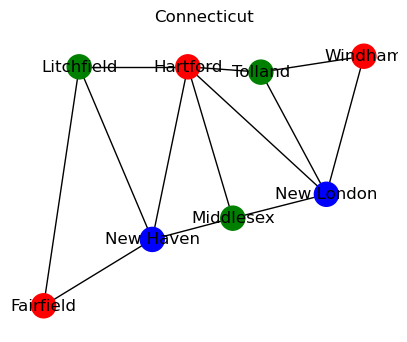

In [ ]:
if connecticut_solution:
    draw_map("Connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 2. Color Connecticut with Three Colors

In [ ]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green"], trace=True)

assigned red to Hartford
assigned blue to New Haven
assigned blue to New London
assigned green to Litchfield
assigned green to Middlesex
assigned green to Tolland
assigned red to Fairfield
assigned red to Windham
solution: [(0, 'red'), (1, 'green'), (2, 'blue'), (3, 'red'), (4, 'green'), (5, 'green'), (6, 'blue'), (7, 'red')]


## Test Connecticut Solution

In [ ]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

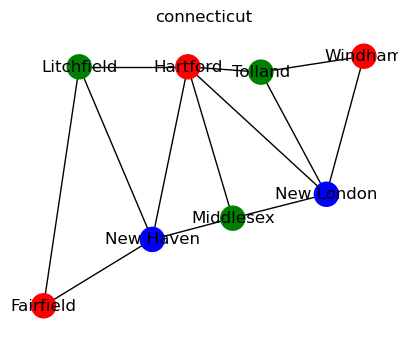

In [ ]:
if connecticut_solution:
    draw_map("connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 3. Color Europe with Four Colors

In [ ]:
europe_graph = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe_graph)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [ ]:
europe_solution = color_map(europe_graph, ["red", "blue", "green", "yellow"], trace=False)

## Test Europe Solution

In [ ]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

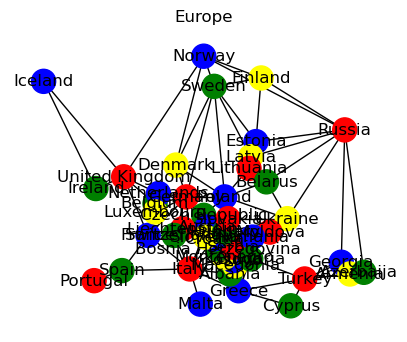

In [ ]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Problem 4. Color Europe with Three Colors

In [ ]:
europe_solution = color_map(europe_graph, ["red", "blue", "green"], trace=False)

## Test Europe Solution

In [ ]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

In [ ]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".